### 绘制样本图像

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
path = 'ex2data1.txt'
data = pd.read_csv(path, header = None, names=['Exam1', 'Exam2', 'Admitted'])

data.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
data.describe()

,Exam1,Exam2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


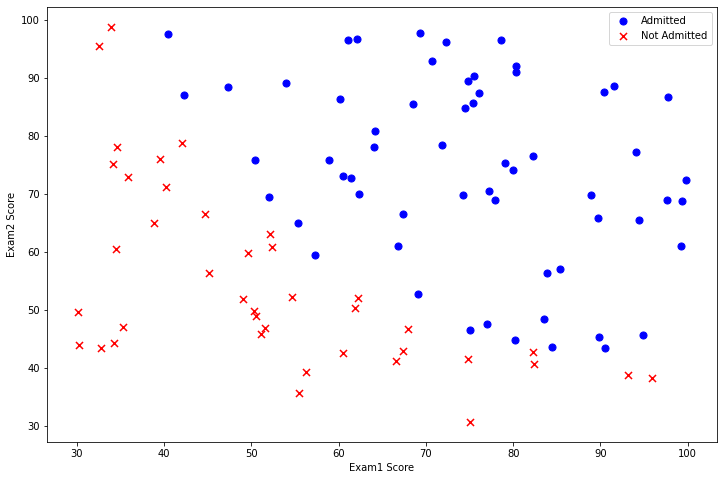

In [5]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['Exam1'], positive['Exam2'], s = 50, c = 'b', marker = 'o', label = 'Admitted')
ax.scatter(negative['Exam1'], negative['Exam2'], s = 50, c = 'r', marker = 'x', label = 'Not Admitted')
ax.legend()
ax.set_xlabel('Exam1 Score')
ax.set_ylabel('Exam2 Score')

plt.show()

### sigmoid函数
$$
h_{\theta} = g({\theta^T}x)
$$
$${g(z) = {1 \over {1+{e^{-z}}}}}$$

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

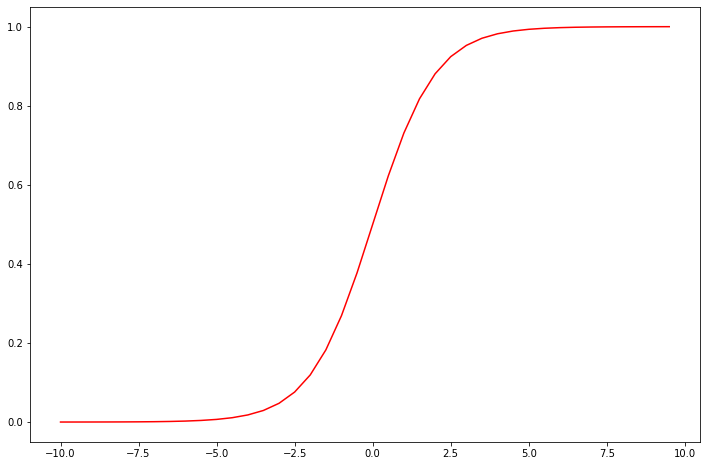

In [7]:
nums = np.arange(-10, 10, step = 0.5)
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(nums, sigmoid(nums), 'r')

plt.show()

### 代价函数

In [8]:
def cost(theta, X, Y):
    first = Y * np.log(sigmoid(X@theta.T))
    second = (1 - Y) * np.log(1 - sigmoid(X@theta.T))
    return -1 * np.mean(first + second)

### 数据预处理

In [9]:
# add ones column
data.insert(0, 'ones', 1)

In [10]:
# set X(traning data) and Y(traning data)
X = data.iloc[:, 0 : -1].values
Y = data.iloc[:, -1].values

theta = np.zeros(3)

In [11]:
theta

array([0., 0., 0.])

In [12]:
X.shape, Y.shape, theta.shape

((100, 3), (100,), (3,))

In [13]:
cost(theta, X, Y)

0.6931471805599453

### 梯度下降

In [14]:
# 计算步长
def gradient(theta, X, Y):
    return (1 / len(X) * X.T @ (sigmoid(X @ theta.T) - Y))

In [15]:
gradient(theta, X, Y)

array([ -0.1       , -12.00921659, -11.26284221])

### 拟合参数

In [16]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, Y))
result

(array([-25.16131857,   0.20623159,   0.20147149]), 36, 0)

In [17]:
type(result)

tuple

In [18]:
cost(result[0], X, Y)

0.20349770158947475

In [19]:
res = opt.minimize(fun=cost, x0=np.array(theta), args=(X, np.array(Y)), method='Newton-CG', jac=gradient)
res

     fun: 0.20349770249211604
     jac: array([2.67323741e-05, 1.76854178e-03, 1.64489142e-03])
 message: 'Optimization terminated successfully.'
    nfev: 73
    nhev: 0
     nit: 29
    njev: 204
  status: 0
 success: True
       x: array([-25.16376776,   0.20625197,   0.20149048])

In [20]:
cost(res.x, X, Y)

0.20349770249211604

根据$\theta$进行预测：${h_\theta(x)=\frac{1}{1+e^{-\theta^TX}}}$

$h_\theta\ge0.5$, 预测$y=1$

$h_\theta<0.5$, 预测$y=0$

In [23]:
def prediction(theta, X):
    probablity = sigmoid(X @ theta.T)
    return [1 if x >= 0.5 else 0 for x in probablity]

In [24]:
theta_min = np.matrix(result[0])
predictions = prediction(theta_min, X)
correct = [1 if a^b == 0 else 0 for (a, b) in zip(predictions, Y)]
accuracy = (sum(correct) / len(correct))
print('accuracy = {0:.0f}%'.format(accuracy * 100))

accuracy = 89%


In [25]:
from sklearn.metrics import classification_report
print(classification_report(Y, predictions))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



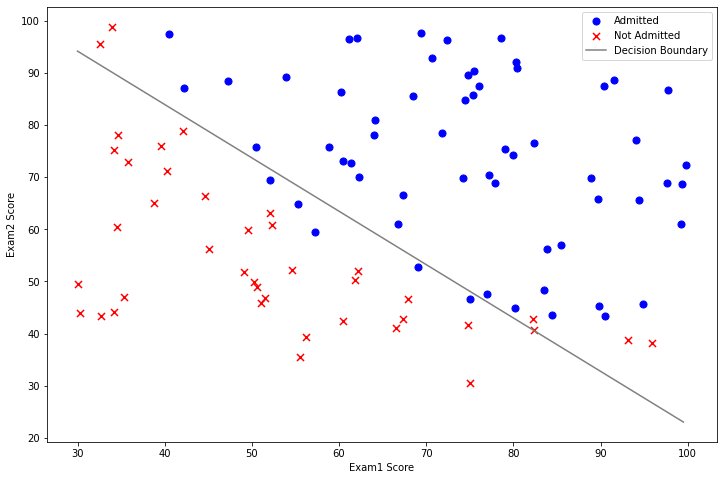

In [27]:
coef = -res.x / res.x[2]
x = np.arange(30, 100, 0.5)
y = coef[0] + coef[1] * x

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['Exam1'], positive['Exam2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam1'], negative['Exam2'], s=50, c='r', marker='x', label='Not Admitted')
ax.plot(x, y, label='Decision Boundary', c='grey')
ax.legend()
ax.set_xlabel('Exam1 Score')
ax.set_ylabel('Exam2 Score')

plt.show()